In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import pandas as pd
import numpy as np
import re
import random

# set seed 
SEED = 7
random.seed(SEED)

data = pd.read_csv('combined_clean_fb.csv')

In [5]:
print(data)

                                                   text sentiment
0     I hope that in the near future, they can use a...  positive
1                           Mark Lester Calimag Apostol   neutral
2     Sana makapagturo ako sa kanila  😍💗 as part of ...  positive
3     I hope we get this kind of news everyday ❤️ So...  positive
4     Wow very good news DICT lalong pinalakas na an...  positive
...                                                 ...       ...
7005  You may check the mobile phone number register...  positive
7006  that's why I didn't ask you again GetGo PH you...  negative
7007  Luz Zuniga Villanueva kanino kaya pwede irekla...   neutral
7008  GetGo PH prove to us ur not a SCAM.ang dami na...  negative
7009  Luz Zuniga Villanueva yes manloloko cla i hav ...   neutral

[7010 rows x 2 columns]


In [6]:
# convert all letters to lower case
data['lower'] = data['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [7]:
# remove all the links from the dataset
data['delink'] = [re.sub(r'http\S+', '', data) for data in data['lower']] 

In [8]:
# remove the punctuations and empty rows
data['depunctuation'] = data['delink'].str.replace('[^\w\s]', '')
data['depunctuation'].replace('', np.nan, inplace=True)
data.dropna(subset=['depunctuation'], inplace=True)

In [9]:
data

text sentiment  \
0     I hope that in the near future, they can use a...  positive   
1                           Mark Lester Calimag Apostol   neutral   
2     Sana makapagturo ako sa kanila  😍💗 as part of ...  positive   
3     I hope we get this kind of news everyday ❤️ So...  positive   
4     Wow very good news DICT lalong pinalakas na an...  positive   
...                                                 ...       ...   
7005  You may check the mobile phone number register...  positive   
7006  that's why I didn't ask you again GetGo PH you...  negative   
7007  Luz Zuniga Villanueva kanino kaya pwede irekla...   neutral   
7008  GetGo PH prove to us ur not a SCAM.ang dami na...  negative   
7009  Luz Zuniga Villanueva yes manloloko cla i hav ...   neutral   

                                                  lower  \
0     i hope that in the near future, they can use a...   
1                           mark lester calimag apostol   
2     sana makapagturo ako sa kanila 😍💗 as part of m...   
3     i hope we get this kind of news everyday ❤️ so...   
4     wow very good news dict lalong pinalakas na an...   
...                                                 ...   
7005  you may check the mobile phone number register...   
7006  that's why i didn't ask you again getgo ph you...   
7007  luz zuniga villanueva kanino kaya pwede irekla...   
7008  getgo ph prove to us ur not a scam.ang dami na...   
7009  luz zuniga villanueva yes manloloko cla i hav ...   

                                                 delink  \
0     i hope that in the near future, they can use a...   
1                           mark lester calimag apostol   
2     sana makapagturo ako sa kanila 😍💗 as part of m...   
3     i hope we get this kind of news everyday ❤️ so...   
4     wow very good news dict lalong pinalakas na an...   
...                                                 ...   
7005  you may check the mobile phone number register...   
7006  that's why i didn't ask you again getgo ph you...   
7007  luz zuniga villanueva kanino kaya pwede irekla...   
7008  getgo ph prove to us ur not a scam.ang dami na...   
7009  luz zuniga villanueva yes manloloko cla i hav ...   

                                          depunctuation  
0     i hope that in the near future they can use a ...  
1                           mark lester calimag apostol  
2     sana makapagturo ako sa kanila  as part of my ...  
3     i hope we get this kind of news everyday  sobr...  
4     wow very good news dict lalong pinalakas na an...  
...                                                 ...  
7005  you may check the mobile phone number register...  
7006  thats why i didnt ask you again getgo ph you r...  
7007  luz zuniga villanueva kanino kaya pwede irekla...  
7008  getgo ph prove to us ur not a scamang dami nam...  
7009  luz zuniga villanueva yes manloloko cla i hav ...  

[6972 rows x 5 columns]

In [10]:
data['text'] = data['depunctuation']

In [11]:
new_dataset = data.iloc[:,:2]
print(len(new_dataset[(new_dataset.sentiment =='positive')]))
print(len(new_dataset[(new_dataset.sentiment =='negative')]))
print(len(new_dataset[(new_dataset.sentiment =='neutral')]))

2217
916
3718


In [12]:
new_dataset = new_dataset[(new_dataset.sentiment == 'positive') & (new_dataset.sentiment == 'negative')]

In [13]:
positive_only = new_dataset[(new_dataset.sentiment == 'positive')]

In [14]:
positive_only

text sentiment
0     i hope that in the near future they can use a ...  positive
2     sana makapagturo ako sa kanila  as part of my ...  positive
3     i hope we get this kind of news everyday  sobr...  positive
4     wow very good news dict lalong pinalakas na an...  positive
5     meron po ba sa bulacan san jose del montepls s...  positive
...                                                 ...       ...
6996                           rfrn luisa ito yung page  positive
6999  hi ma for you to avail the offer you must ente...  positive
7001  any1 knows or experienced buy tiket frm your g...  positive
7004  panu po if nakaregister na aq nd ko nalagay ge...  positive
7005  you may check the mobile phone number register...  positive

[2217 rows x 2 columns]

In [0]:
new_dataset.loc[new_dataset["sentiment"] == 'positive', "sentiment"] = 1
new_dataset.loc[new_dataset["sentiment"] == 'negative', "sentiment"] = 0

In [13]:
new_dataset

text sentiment
0     i hope that in the near future they can use a ...         1
2     sana makapagturo ako sa kanila  as part of my ...         1
3     i hope we get this kind of news everyday  sobr...         1
4     wow very good news dict lalong pinalakas na an...         1
5     meron po ba sa bulacan san jose del montepls s...         1
8     department of information and communications t...         1
9     good day yuki you may refer to the following l...         1
13                        sana all pati s public school         0
14                                       way to go dict         1
15           grabe initiative ng government thanks dict         1
16    bnbgyan lng nila limitation ng pggmit pra mas ...         1
18        free wifi nga hanggang 50mb lng sa guest user         1
19    free tas limit 30mb gaya dito sa davao city aa...         1
20                  thank you dict thank you government         0
21    department of information and communications t...         0
22                      ang pipol konek nyo di gumagana         0
24    converge ict is deaf to our complaints pls hel...         0
26    what impact can dict give to our constituents ...         1
27                      go jesson our future astronaut          1
28                             watching from your heart         1
31                           go chris future rocket man         1
33                   gogogo jenevel make lawrence proud         1
34                                       go team gadon          1
38                                   watching from moon         1
39                                 i am proud of myself         1
40                            pa popcorn naman jan haha         1
41    i d like to have the training like them please...         1
43                     we hope to have this in zambales         1
44                           go jen snack lang amo haha         1
48               shoutout sa bizfrend digital solutions         1
...                                                 ...       ...
6961                            joke time na getgo sale         1
6965                      how to apply get go visa card         1
6966  which specific ceb getgo visa card you are per...         1
6968       if i apply now can i use the code right away         1
6970                    how can i avail my getgo points         1
6971  hi algems do you wish to redeem your points fo...         1
6972  kindly include me in your list when there is a...         1
6973  hi leilanie do you mean you wish to receive a ...         1
6975                       getgo ph thanks for the info         1
6977                                    totoo na ba yen         1
6979  thank you for you your interest on our ceb get...         1
6980  getgo ph i already used up all my points on my...         0
6984  yes lizel you may book a flight using your get...         1
6985           magnificent getgo slow clap for you guys         1
6987                             getgo ph ok thank u po         1
6990  yes iamja all it takes is just a minimum of 50...         1
6991  may i know what is the conversion of the get g...         1
6992  if i apply for virtual card how can i connect ...         1
6994  wala ka bang makachat si cashy cashy ang gawin...         1
6995  please note that your concern is in progress w...         1
6996                           rfrn luisa ito yung page         1
6997  sergeii j f arceovich not applicable for domes...         0
6999  hi ma for you to avail the offer you must ente...         1
7000  we already responded to your pm aishah please ...         0
7001  any1 knows or experienced buy tiket frm your g...         1
7002  getgo ph i already forgot the number i used in...         0
7004  panu po if nakaregister na aq nd ko nalagay ge...         1
7005  you may check the mobile phone number register...         1
7006  thats why i didnt ask you again getgo ph you r...         0
7008  getgo ph prove to u

In [0]:
X = new_dataset["text"]
y = new_dataset["sentiment"]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

cv = TfidfVectorizer()

In [0]:
X_cv = cv.fit_transform(X)
y = y.astype('int')

In [0]:
models = []
results = []
names = []
cv_mean = []
cv_std = []


models.append(('SVM', SVC(gamma = 'auto', kernel = 'linear')))
models.append(('NB', MultinomialNB()))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = .2, random_state = SEED)

# compare the models through K-fold cross validation
from sklearn import model_selection

for name, model in models:
    kfold = model_selection.KFold(n_splits = 5, random_state = SEED)
    cv_results = model_selection.cross_val_score(model, X_cv, y, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    cv_mean.append(cv_results.mean())
    cv_std.append(cv_results.std())

In [19]:
# results
header = "%s:\t %s \t %s" % ("Algo", "CV Mean", "Std")
print(header)
for i in range(len(names)):
    result = "%s\t%f\t(%f)" % (names[i], cv_mean[i], cv_std[i])
    print(result)

Algo:	 CV Mean 	 Std
SVM	0.827636	(0.027479)
NB	0.724869	(0.036762)


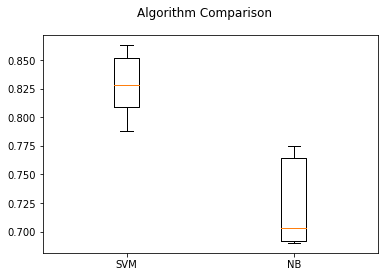

In [20]:
# visualize and compare models
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
model = SVC(gamma = 'auto', kernel = 'linear')
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8696    0.6135    0.7194       163
           1     0.8770    0.9677    0.9201       464

    accuracy                         0.8756       627
   macro avg     0.8733    0.7906    0.8198       627
weighted avg     0.8750    0.8756    0.8679       627



In [22]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.1166    0.2088       163
           1     0.7632    1.0000    0.8657       464

    accuracy                         0.7703       627
   macro avg     0.8816    0.5583    0.5372       627
weighted avg     0.8247    0.7703    0.6949       627



In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers

print(tf.version.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [25]:
# Install TensorFlow
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.version.VERSION)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.14.0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

In [0]:
for idx,row in new_dataset.iterrows():
    row[0] = row[0].replace('rt',' ')

In [0]:
max_fatures = 2000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(new_dataset['text'].values)
X = tokenizer.texts_to_sequences(new_dataset['text'].values)
X = pad_sequences(X)

In [29]:
print(X)

[[   0    0    0 ...  684    9  303]
 [   0    0    0 ...   15   23   35]
 [   0    0    0 ...  104  146   11]
 ...
 [   0    0    0 ...   91 1085  472]
 [   0    0    0 ...  802  260   38]
 [   0    0    0 ...  368  225   46]]


In [30]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

W0814 04:48:49.805375 140495419971456 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0814 04:48:49.863985 140495419971456 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0814 04:48:49.868858 140495419971456 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 403, 128)          256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 403, 128)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 392)               509600    
_________________________________________________________________
dense (Dense)                (None, 1)                 393       
Total params: 765,993
Trainable params: 765,993
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
Y = pd.get_dummies(new_dataset['sentiment']).values
Y = np.delete(Y, 0, axis=1)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = SEED)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2506, 403) (2506, 1)
(627, 403) (627, 1)


In [33]:
batch_size = 64
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 1)

Epoch 1/7
2506/2506 [==============================] - 61s 24ms/sample - loss: 0.6127 - acc: 0.6927
Epoch 2/7
2506/2506 [==============================] - 60s 24ms/sample - loss: 0.5158 - acc: 0.7498
Epoch 3/7
2506/2506 [==============================] - 61s 24ms/sample - loss: 0.3510 - acc: 0.8520
Epoch 4/7
2506/2506 [==============================] - 60s 24ms/sample - loss: 0.2597 - acc: 0.8990
Epoch 5/7
2506/2506 [==============================] - 60s 24ms/sample - loss: 0.2126 - acc: 0.9186
Epoch 6/7
2506/2506 [==============================] - 59s 24ms/sample - loss: 0.1694 - acc: 0.9338
Epoch 7/7
2506/2506 [==============================] - 60s 24ms/sample - loss: 0.1402 - acc: 0.9517


In [34]:
score, accuracy = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = 1)


627/627 [==============================] - 6s 10ms/sample - loss: 0.4353 - acc: 0.8565


In [35]:
print("score: %.2f" % (score))
print("acc: %.2f" % (accuracy))

score: 0.44
acc: 0.86


In [0]:
pred = model.predict(X_test)

In [0]:
pred = [int(round(x[0])) for x in pred]

In [38]:
print(classification_report(Y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.7483    0.6748    0.7097       163
           1     0.8896    0.9203    0.9047       464

    accuracy                         0.8565       627
   macro avg     0.8189    0.7976    0.8072       627
weighted avg     0.8529    0.8565    0.8540       627

